In [2]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np

from csbdeep.utils import normalize
from glob import glob
from skimage import io
from stardist.matching import matching_dataset
from stardist.models import StarDist2D
from tqdm import tqdm

from utils import show_test_images, taus

In [3]:
# Directories
image_dir = f'../images'
hela_dir = f'{image_dir}/fluo-ND2L-HeLa'

In [4]:
# Read test images and masks, normalize test images
hela_X_test_names = sorted(glob(f'{hela_dir}/test/images/*.tif'))
hela_X_test = [normalize(img, 1, 99.8, axis=(0, 1)) for img in list(map(io.imread, hela_X_test_names))]
hela_Y_test_names = sorted(glob(f'{hela_dir}/test/masks/*.tif'))
hela_Y_test = list(map(io.imread, hela_Y_test_names))

In [5]:
# Load pretrained model for 2d fluorescent images
pretrained_stardist_model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [6]:
pretrained_stardist_hela_Y_pred = [pretrained_stardist_model.predict_instances(x, n_tiles=pretrained_stardist_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(hela_X_test)]

100%|██████████| 92/92 [02:56<00:00,  1.92s/it]


In [7]:
pretrained_stardist_hela_Y_pred_labels = [pred[0] for pred in pretrained_stardist_hela_Y_pred]
pretrained_stardist_hela_stats = [matching_dataset(hela_Y_test, pretrained_stardist_hela_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:31<00:00,  3.54s/it]


In [8]:
pretrained_stardist_hela_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=3027, tp=24156, fn=665, precision=0.8886436375675973, recall=0.9732081705007857, accuracy=0.8674231542660155, f1=0.9290054611183756, n_true=24821, n_pred=27183, mean_true_score=0.8899826710520118, mean_matched_score=0.9144833531289114, panoptic_quality=0.8495600291586025, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=3030, tp=24153, fn=668, precision=0.8885332744730162, recall=0.9730873051045486, accuracy=0.8672220028006176, f1=0.9288900853780478, n_true=24821, n_pred=27183, mean_true_score=0.8899665271240133, mean_matched_score=0.9145803490144137, panoptic_quality=0.8495446184810835, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=3061, tp=24122, fn=699, precision=0.8873928558290107, recall=0.9718383626767656, accuracy=0.8651459723118858, f1=0.9276978693946619, n_true=24821, n_pred=27183, mean_true_score=0.88965038213949, mean_matched_score=0.9154304010896395, panoptic_quality=0.8492428326699593, by

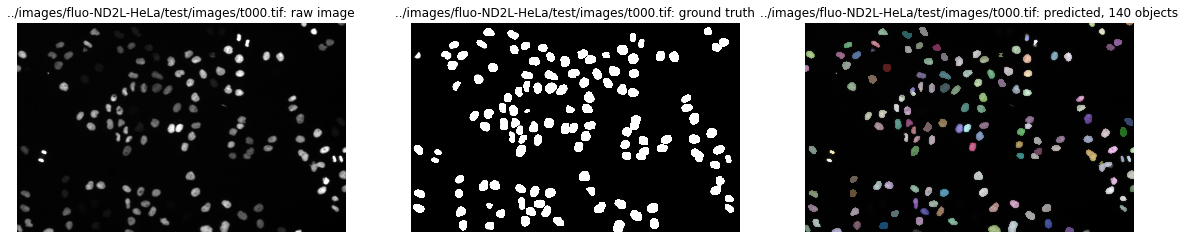

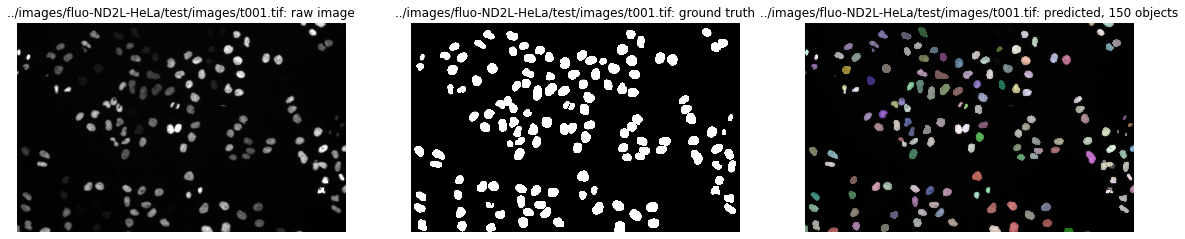

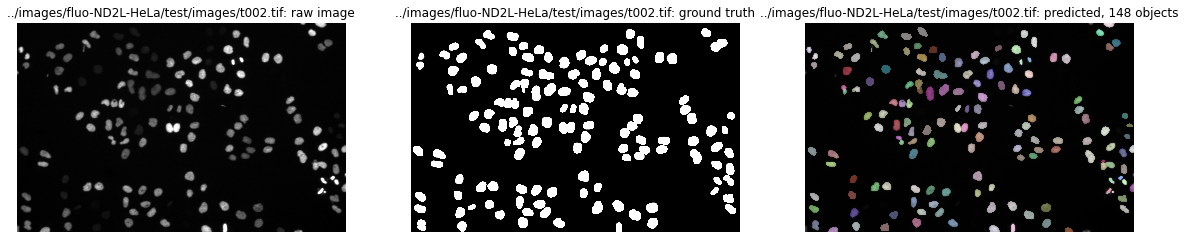

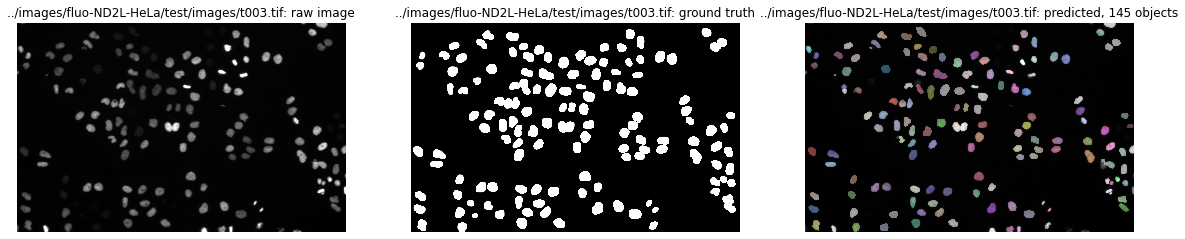

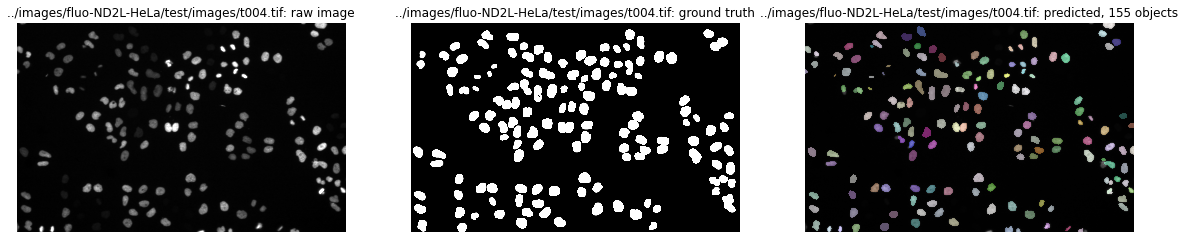

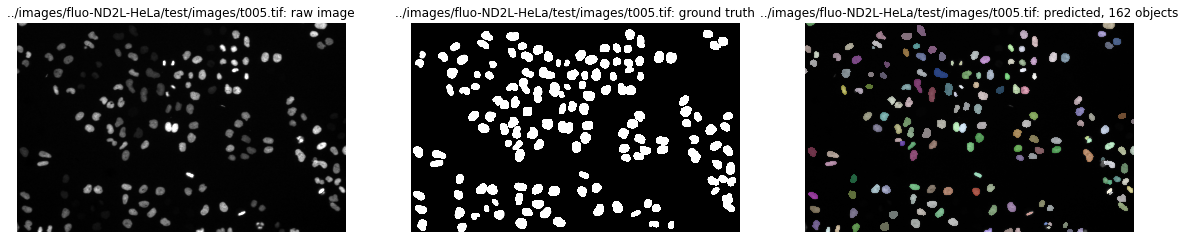

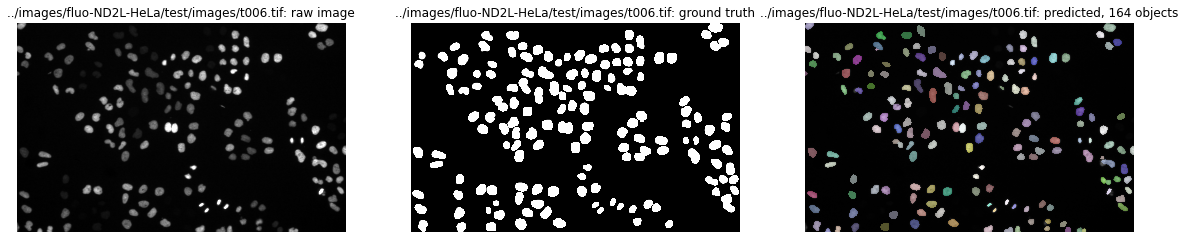

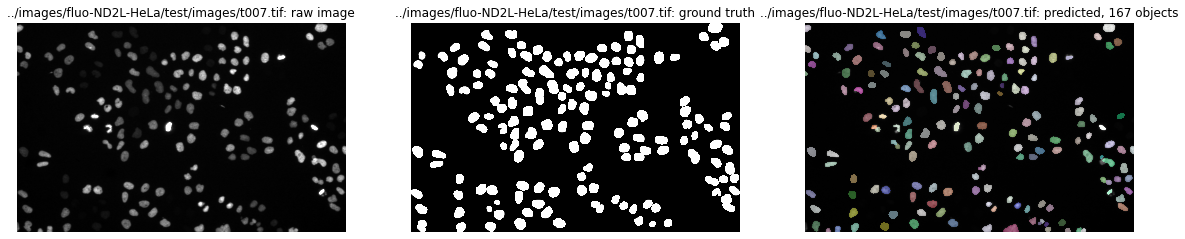

In [9]:
# Show first 8 predictions
show_test_images(hela_X_test, hela_Y_test, pretrained_stardist_hela_Y_pred, hela_X_test_names, 8)